## Install NADE

In [6]:
pip install git+https://github.com/inkrement/nade.git

  Cloning https://github.com/inkrement/nade.git to /private/var/folders/bj/7qq4f8jd6c5cghfq94hrdlhr0000gn/T/pip-req-build-xyk45j7g
  Running command git clone --filter=blob:none --quiet https://github.com/inkrement/nade.git /private/var/folders/bj/7qq4f8jd6c5cghfq94hrdlhr0000gn/T/pip-req-build-xyk45j7g
  Resolved https://github.com/inkrement/nade.git to commit 54ed76dc7c07deb4b636d6a215c34fee6ffc3ffd
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip show nade


Name: nade
Version: 0.2.7
Summary: Natural affect detection allows to infer basic emotions from social media messages
Home-page: https://nade-explorer.inkrement.ai/
Author: Christian Hotz-Behofsits
Author-email: 
License: MIT
Location: /opt/anaconda3/lib/python3.12/site-packages
Requires: fasttext-wheel, lightgbm, numpy, pyarrow, pybind11
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [8]:
ls /Users/yourname/path/to/site-packages/nade


ls: /Users/yourname/path/to/site-packages/nade: No such file or directory


In [9]:
!pip uninstall nade -y
!pip install nade==0.2.7


Found existing installation: nade 0.2.7
Uninstalling nade-0.2.7:
  Successfully uninstalled nade-0.2.7
  Using cached nade-0.2.7-py3-none-any.whl.metadata (2.8 kB)
Reason for being yanked: inference broken, will fix with next release
Using cached nade-0.2.7-py3-none-any.whl (13.4 MB)


In [10]:
import nade
print(nade.__file__)


/opt/anaconda3/lib/python3.12/site-packages/nade/__init__.py


In [11]:
pip show nade


Name: nade
Version: 0.2.7
Summary: Natural affect detection allows to infer basic emotions from social media messages
Home-page: https://nade-explorer.inkrement.ai/
Author: Christian Hotz-Behofsits
Author-email: 
License: MIT
Location: /opt/anaconda3/lib/python3.12/site-packages
Requires: fasttext-wheel, lightgbm, numpy, pyarrow, pybind11
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [12]:
import os

nade_path = "/opt/anaconda3/lib/python3.12/site-packages/nade"
for root, dirs, files in os.walk(nade_path):
    print(f"\n📂 Directory: {root}")
    for file in files:
        print(f"  - {file}")



📂 Directory: /opt/anaconda3/lib/python3.12/site-packages/nade
  - nade.py
  - __init__.py

📂 Directory: /opt/anaconda3/lib/python3.12/site-packages/nade/__pycache__
  - nade.cpython-312.pyc
  - __init__.cpython-312.pyc

📂 Directory: /opt/anaconda3/lib/python3.12/site-packages/nade/data
  - __init__.py

📂 Directory: /opt/anaconda3/lib/python3.12/site-packages/nade/data/__pycache__
  - __init__.cpython-312.pyc

📂 Directory: /opt/anaconda3/lib/python3.12/site-packages/nade/data/socialmedia_en
  - reg_joy.txt
  - reg_trust.txt
  - reg_disgust.txt
  - reg_anger.txt
  - reg_sadness.txt
  - emoji_frequencies.jsonl
  - reg_fear.txt
  - reg_joy.txt.gz
  - reg_disgust.txt.gz
  - reg_surprise.txt
  - reg_anticipation.txt.gz
  - reg_surprise.txt.gz
  - reg_sadness.txt.gz
  - reg_anger.txt.gz
  - nade_250k_hp.ftz
  - reg_fear.txt.gz
  - reg_anticipation.txt
  - reg_trust.txt.gz


In [13]:
cat /opt/anaconda3/lib/python3.12/site-packages/nade/nade.py

from typing import List, Optional, Union
import fasttext
import json
from . import __path__ as ROOT_PATH
from os.path import isfile
import pyarrow.compute as pcm
import pyarrow as pa
import warnings

# hotfix: ignore warning
fasttext.FastText.eprint = lambda x: None


class Nade:
    def __init__(self, model: str = 'socialmedia_en', lleaves: bool = False):
        """
        Loads the models and lookup tables.
        """
        root_pth = ROOT_PATH[0]

        # set paths and check them
        self.model_paths = {
            'base': f'{root_pth}/data/{model}',
            'emoji_index': f'{root_pth}/data/{model}/emoji_frequencies.jsonl',
            'emoji_clf': f'{ROOT_PATH[0]}/data/{model}/nade_250k_hp.ftz'
        }

        assert isfile(self.model_paths['emoji_index'])
        assert isfile(self.model_paths['emoji_clf'])

        # load emoji index
        self.emojis = dict()

        with open(self.model_paths['emoji_index']) as f:
            for line in f:
               

### Test NADE

In [15]:
from nade.nade import Nade

predictor = Nade()
result = predictor.predict("This serum changed my skin!")
print(result)


{'anger': <pyarrow.lib.DoubleArray object at 0x168c7f1c0>
[
  0.185
], 'anticipation': <pyarrow.lib.DoubleArray object at 0x168c7f3a0>
[
  0.244
], 'disgust': <pyarrow.lib.DoubleArray object at 0x168c7f4c0>
[
  0.058
], 'fear': <pyarrow.lib.DoubleArray object at 0x168c7f6a0>
[
  0.162
], 'joy': <pyarrow.lib.DoubleArray object at 0x168c7f5e0>
[
  0.185
], 'sadness': <pyarrow.lib.DoubleArray object at 0x168c7f820>
[
  0.112
], 'surprise': <pyarrow.lib.DoubleArray object at 0x168c7f880>
[
  0.123
], 'trust': <pyarrow.lib.DoubleArray object at 0x168c7f8e0>
[
  0.324
]}


## Install libraries necessaire

In [1]:
import pandas as pd
from nade.nade import Nade
import os

## Add Trust and Joy scores columns on each file

In [3]:
# Initialize the Nade predictor
predictor = Nade()
nade_emotions = ['joy', 'trust']

# Function to calculate Nade scores for each row
def get_nade_scores_row(row):
    # If comment (c_text) is not empty or whitespace, use it. Otherwise, use the post (p_text)
    if pd.notna(row['c_text']) and str(row['c_text']).strip() != "":
        text = row['c_text']
    elif pd.notna(row['p_text']) and str(row['p_text']).strip() != "":
        text = row['p_text']
    else:
        return [None] * len(nade_emotions)
    
    try:
        result = predictor.predict(text)
        return [result.get(e).to_pylist()[0] if result.get(e) is not None else None for e in nade_emotions]
    except Exception as e:
        print(f"Error in row: {e}")
        return [None] * len(nade_emotions)

# Process CSV files in the current working directory
folder_path = os.getcwd()

for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)

        # Generate emotion scores
        df[nade_emotions] = df.apply(get_nade_scores_row, axis=1, result_type='expand')

        # Save with _nade suffix
        new_path = os.path.join(folder_path, file_name.replace(".csv", "_nade.csv"))
        df.to_csv(new_path, index=False)
        print(f"Processed and saved: {new_path}")

Processed and saved: /Users/joyeongyeong/Documents/Thesis/reddit_niche_uriage_nade.csv
Processed and saved: /Users/joyeongyeong/Documents/Thesis/reddit_mass_garnier_nade.csv
Processed and saved: /Users/joyeongyeong/Documents/Thesis/reddit_mass_nivea_nade.csv
Processed and saved: /Users/joyeongyeong/Documents/Thesis/reddit_mass_neutrogena_nade.csv
Processed and saved: /Users/joyeongyeong/Documents/Thesis/reddit_niche_avène_nade.csv
Processed and saved: /Users/joyeongyeong/Documents/Thesis/reddit_niche_bioderma_nade.csv
Processed and saved: /Users/joyeongyeong/Documents/Thesis/reddit_niche_la_roche-posay_nade.csv
Processed and saved: /Users/joyeongyeong/Documents/Thesis/reddit_mass_loreal_paris_nade.csv
Processed and saved: /Users/joyeongyeong/Documents/Thesis/reddit_niche_cerave_nade.csv


## Combined all NADE score files 

In [5]:
# Get the current working directory
folder_path = os.getcwd()
all_dfs = []

# Load all CSV files ending with '_nade.csv'
for file_name in os.listdir(folder_path):
    if file_name.endswith("_nade.csv"):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        all_dfs.append(df)

# Combine all dataframes
combined_df = pd.concat(all_dfs, ignore_index=True)

# Save the combined dataframe
combined_df.to_csv("combined_nade_reddit.csv", index=False)
print("Saved as combined_nade_reddit.csv")

Saved as combined_nade_reddit.csv


In [52]:
# Create a list of CSV files in the current working directory
csv_files = [f for f in os.listdir() if f.endswith('.csv') and 'nade' in f]  # Select only .csv Nfiles from the current directory

# Print the number of rows for each file
for file in csv_files:
    df = pd.read_csv(file)  # Read the CSV file
    row_count = len(df)  # Calculate the number of rows
    print(f"File: {file}, Number of rows: {row_count}")

File: reddit_niche_bioderma_nade.csv, Number of rows: 5242
File: reddit_niche_cerave_nade.csv, Number of rows: 18268
File: reddit_mass_neutrogena_nade.csv, Number of rows: 9664
File: combined_nade_reddit.csv, Number of rows: 84158
File: reddit_niche_la_roche-posay_nade.csv, Number of rows: 10051
File: reddit_niche_uriage_nade.csv, Number of rows: 3304
File: reddit_niche_avène_nade.csv, Number of rows: 6060
File: reddit_mass_nivea_nade.csv, Number of rows: 11286
File: reddit_mass_garnier_nade.csv, Number of rows: 12308
File: reddit_mass_loreal_paris_nade.csv, Number of rows: 7975


In [60]:
import os
import pandas as pd

csv_files = [f for f in os.listdir() if f.endswith('.csv') and 'nade' in f.lower()]


results = []

for file in csv_files:
    try:
        df = pd.read_csv(file)
        results.append({'File': file, 'Number of rows': len(df)})
    except Exception as e:
        print(f"{file} read error: {e}")


result_df = pd.DataFrame(results)
print(result_df)


                                   File  Number of rows
0        reddit_niche_bioderma_nade.csv            5242
1          reddit_niche_cerave_nade.csv           18268
2       reddit_mass_neutrogena_nade.csv            9664
3              combined_nade_reddit.csv           84158
4  reddit_niche_la_roche-posay_nade.csv           10051
5          reddit_niche_uriage_nade.csv            3304
6           reddit_niche_avène_nade.csv            6060
7            reddit_mass_nivea_nade.csv           11286
8          reddit_mass_garnier_nade.csv           12308
9     reddit_mass_loreal_paris_nade.csv            7975


## Difference of positioning

### 1. This result is from a t-test performed on the entire dataset as is.

This is because in the code, the data was split into 'niche' and 'mass' groups based on the positioning variable, and then the t-test was conducted using all available trust and joy scores within each group.

In other words, the analysis was done on the full dataset in its imbalanced state, and no random sampling was performed yet to balance the number of reviews across brands.

In [9]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the merged dataset
combined_df = pd.read_csv("combined_nade_reddit.csv")

# Split the data into 'niche' and 'mass' brand groups
niche = combined_df[combined_df["positioning"] == "niche"]
mass = combined_df[combined_df["positioning"] == "mass"]

# Hypothesis 1 (H1): Difference in mean 'trust' score
trust_test = ttest_ind(niche["trust"].dropna(), mass["trust"].dropna(), equal_var=False)
print(f"H1 (trust): t = {trust_test.statistic:.3f}, p = {trust_test.pvalue:.4f}")

# Hypothesis 2 (H2): Difference in mean 'joy' score
joy_test = ttest_ind(niche["joy"].dropna(), mass["joy"].dropna(), equal_var=False)
print(f"H2 (joy): t = {joy_test.statistic:.3f}, p = {joy_test.pvalue:.4f}")


H1 (trust): t = -9.874, p = 0.0000
H2 (joy): t = -9.683, p = 0.0000


### Overall average

#### By positioning

In [11]:
combined_df = pd.read_csv("combined_nade_reddit.csv")

filtered_df = combined_df[combined_df['positioning'].isin(['mass', 'niche'])]

average_scores = filtered_df.groupby('positioning')[['trust', 'joy']].mean().reset_index()

print(average_scores)

  positioning     trust       joy
0        mass  0.233942  0.212487
1       niche  0.226940  0.205086


#### By brand

In [13]:
df = pd.read_csv('combined_nade_reddit.csv')
df.groupby('brand')[['trust', 'joy']].mean()

,trust,joy
brand,,
Avène,0.230855,0.208902
Bioderma,0.228836,0.205259
CeraVe,0.224360,0.204279
Garnier,0.223006,0.202490
La Roche-Posay,0.226154,0.201945
L’Oréal Paris,0.253128,0.229356
Neutrogena,0.229591,0.209853
Nivea,0.236042,0.213731
Uriage,0.233615,0.211966


### 2. Balanced Random Sampling

Difference in Trust Scores (H1) and Joy Scores (H2)

To address the imbalance issue, random sampling was performed so that each brand within the mass and niche groups contributed the same number of reviews (the minimum available per group: 7,975 for mass brands and 3,304 for niche brands).
This ensures that no single brand with a large number of reviews dominates the group-level results.

After this balancing, independent t-tests were conducted to compare trust and joy scores between the two groups (niche vs. mass).

**Both p-values are far below 0.05**, indicating a highly statistically significant difference in trust and joy scores between mass and niche brands.

- The negative t-values indicate that the mean trust and joy scores for mass brands are significantly higher than those for niche brands.

- What Does This Mean?
Even after balancing for review count across brands, mass brands consistently receive higher trust and joy scores than niche brands on Reddit.

- This suggests that the observed difference is robust and not simply due to a few brands with many reviews skewing the results.

In [27]:
import pandas as pd
from scipy.stats import ttest_ind

# Load data
combined_df = pd.read_csv("combined_nade_reddit.csv")

# Remove rows with missing values in 'trust' or 'joy'
combined_df = combined_df.dropna(subset=["trust", "joy"])

# Separate data by positioning: mass and niche
mass_df = combined_df[combined_df["positioning"] == "mass"]
niche_df = combined_df[combined_df["positioning"] == "niche"]

# Calculate the minimum sample count per brand in each group
mass_min_count = mass_df.groupby('brand').size().min()
niche_min_count = niche_df.groupby('brand').size().min()

print(f"Mass min sample count per brand: {mass_min_count}")
print(f"Niche min sample count per brand: {niche_min_count}")

# Sample the minimum number of reviews per brand within each group
mass_balanced = mass_df.groupby('brand').apply(lambda x: x.sample(mass_min_count, random_state=42)).reset_index(drop=True)
niche_balanced = niche_df.groupby('brand').apply(lambda x: x.sample(niche_min_count, random_state=42)).reset_index(drop=True)

# Combine the two balanced groups
balanced_df = pd.concat([mass_balanced, niche_balanced])

# Separate again by positioning for t-test
niche = balanced_df[balanced_df["positioning"] == "niche"]
mass = balanced_df[balanced_df["positioning"] == "mass"]

# H1: t-test for trust score difference
trust_test = ttest_ind(niche["trust"], mass["trust"], equal_var=False)
print(f"H1 (trust): t = {trust_test.statistic:.3f}, p = {trust_test.pvalue:.4f}")

# H2: t-test for joy score difference
joy_test = ttest_ind(niche["joy"], mass["joy"], equal_var=False)
print(f"H2 (joy): t = {joy_test.statistic:.3f}, p = {joy_test.pvalue:.4f}")

Mass min sample count per brand: 7871
Niche min sample count per brand: 3210
H1 (trust): t = -7.349, p = 0.0000
H2 (joy): t = -8.063, p = 0.0000


/var/folders/bj/7qq4f8jd6c5cghfq94hrdlhr0000gn/T/ipykernel_8249/4186256943.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mass_balanced = mass_df.groupby('brand').apply(lambda x: x.sample(mass_min_count, random_state=42)).reset_index(drop=True)
/var/folders/bj/7qq4f8jd6c5cghfq94hrdlhr0000gn/T/ipykernel_8249/4186256943.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  niche_balanced = niche_df.group

### For all brands, both trust and joy scores were significantly greater than zero (p < 0.001), indicating consistently positive emotional responses from Reddit users. Mass-market brands tended to have slightly higher mean scores than niche brands.

In [43]:
from scipy.stats import ttest_1samp

# Load the dataset
combined_df = pd.read_csv("combined_nade_reddit.csv")

# Get unique brands by positioning
mass_brands = combined_df[combined_df['positioning'] == 'mass']['brand'].unique()
niche_brands = combined_df[combined_df['positioning'] == 'niche']['brand'].unique()

# Calculate the minimum sample size per brand in each group (at least 2 samples)
mass_brand_counts = combined_df[combined_df['positioning'] == 'mass'].groupby('brand').size()
niche_brand_counts = combined_df[combined_df['positioning'] == 'niche'].groupby('brand').size()

mass_sample_size = mass_brand_counts[mass_brand_counts >= 2].min()
niche_sample_size = niche_brand_counts[niche_brand_counts >= 2].min()

print(f"Mass min sample count per brand: {mass_sample_size}")
print(f"Niche min sample count per brand: {niche_sample_size}")

def sample_brand(df, brand, size):
    brand_df = df[df['brand'].str.lower() == brand.lower()]
    if len(brand_df) < 2:
        print(f"Skipping {brand}: less than 2 samples.")
        return None
    if len(brand_df) < size:
        print(f"Warning: {brand} has less than {size} samples, sampling {len(brand_df)} instead.")
        sample = brand_df
    else:
        sample = brand_df.sample(n=size, random_state=42)
    # Remove missing values and ensure float type
    sample = sample.dropna(subset=['trust', 'joy'])
    sample['trust'] = pd.to_numeric(sample['trust'], errors='coerce')
    sample['joy'] = pd.to_numeric(sample['joy'], errors='coerce')
    return sample

results = []

# One-sample t-test for each niche brand (testing if mean trust/joy is different from 0)
for brand in niche_brands:
    niche_sample = sample_brand(combined_df[combined_df['positioning'] == 'niche'], brand, niche_sample_size)
    if niche_sample is not None and len(niche_sample) > 1:
        for emotion in ['trust', 'joy']:
            if niche_sample[emotion].std() > 0:
                t_stat, p_val = ttest_1samp(niche_sample[emotion], 0)
            else:
                t_stat, p_val = float('nan'), float('nan')
            results.append({
                'brand': brand,
                'positioning': 'niche',
                'emotion': emotion,
                'mean': niche_sample[emotion].mean(),
                't_stat': t_stat,
                'p_value': p_val
            })

# One-sample t-test for each mass brand
for brand in mass_brands:
    mass_sample = sample_brand(combined_df[combined_df['positioning'] == 'mass'], brand, mass_sample_size)
    if mass_sample is not None and len(mass_sample) > 1:
        for emotion in ['trust', 'joy']:
            if mass_sample[emotion].std() > 0:
                t_stat, p_val = ttest_1samp(mass_sample[emotion], 0)
            else:
                t_stat, p_val = float('nan'), float('nan')
            results.append({
                'brand': brand,
                'positioning': 'mass',
                'emotion': emotion,
                'mean': mass_sample[emotion].mean(),
                't_stat': t_stat,
                'p_value': p_val
            })

results_df = pd.DataFrame(results)
print(results_df)



Mass min sample count per brand: 7975
Niche min sample count per brand: 3304
             brand positioning emotion      mean      t_stat  p_value
0         Bioderma       niche   trust  0.228994  130.623687      0.0
1         Bioderma       niche     joy  0.204930  109.987488      0.0
2           CeraVe       niche   trust  0.223115  124.110256      0.0
3           CeraVe       niche     joy  0.201631  104.481760      0.0
4   La Roche-Posay       niche   trust  0.225164  127.689750      0.0
5   La Roche-Posay       niche     joy  0.201339  113.739056      0.0
6           Uriage       niche   trust  0.233615  133.997826      0.0
7           Uriage       niche     joy  0.211966  116.790334      0.0
8            Avène       niche   trust  0.231039  131.401333      0.0
9            Avène       niche     joy  0.208617  113.530332      0.0
10      Neutrogena        mass   trust  0.228712  200.054658      0.0
11      Neutrogena        mass     joy  0.210155  161.414840      0.0
12           

## Not mandatory analysis

/var/folders/bj/7qq4f8jd6c5cghfq94hrdlhr0000gn/T/ipykernel_15046/982789482.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='positioning', y='trust', data=df, palette='pastel')


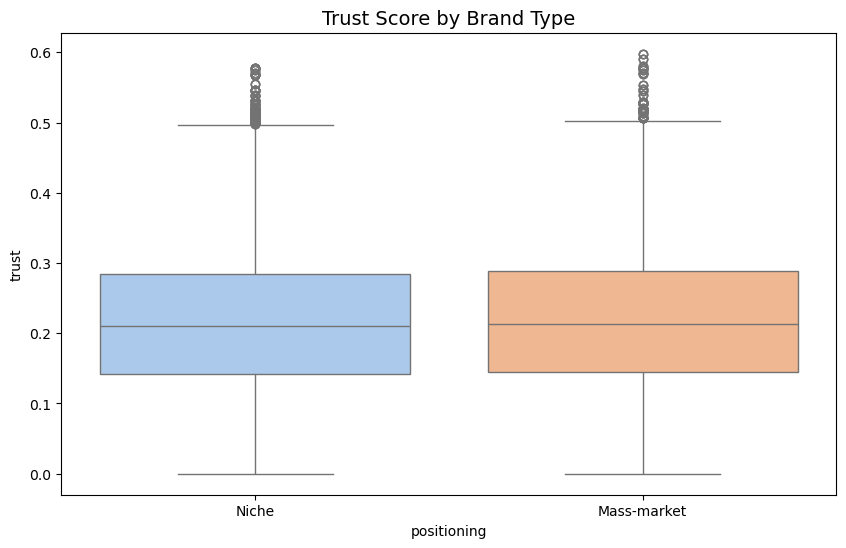

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='positioning', y='trust', data=df, palette='pastel')
plt.title('Trust Score by Brand Type', fontsize=14)
plt.xticks([0, 1], ['Niche', 'Mass-market'])
plt.show()


/var/folders/bj/7qq4f8jd6c5cghfq94hrdlhr0000gn/T/ipykernel_15046/2821515294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand', y='trust', data=df, palette='pastel')


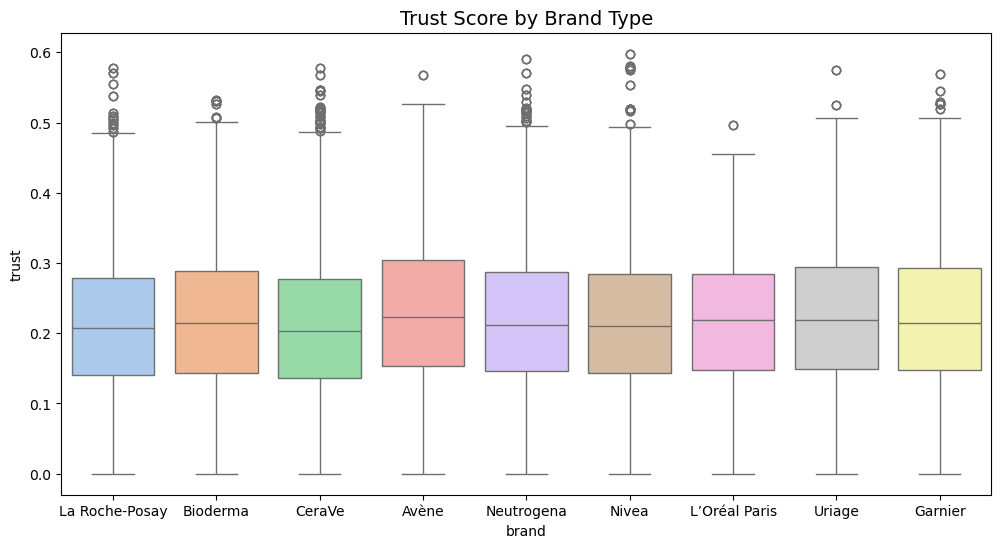

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='trust', data=df, palette='pastel')
plt.title('Trust Score by Brand Type', fontsize=14)
plt.show()


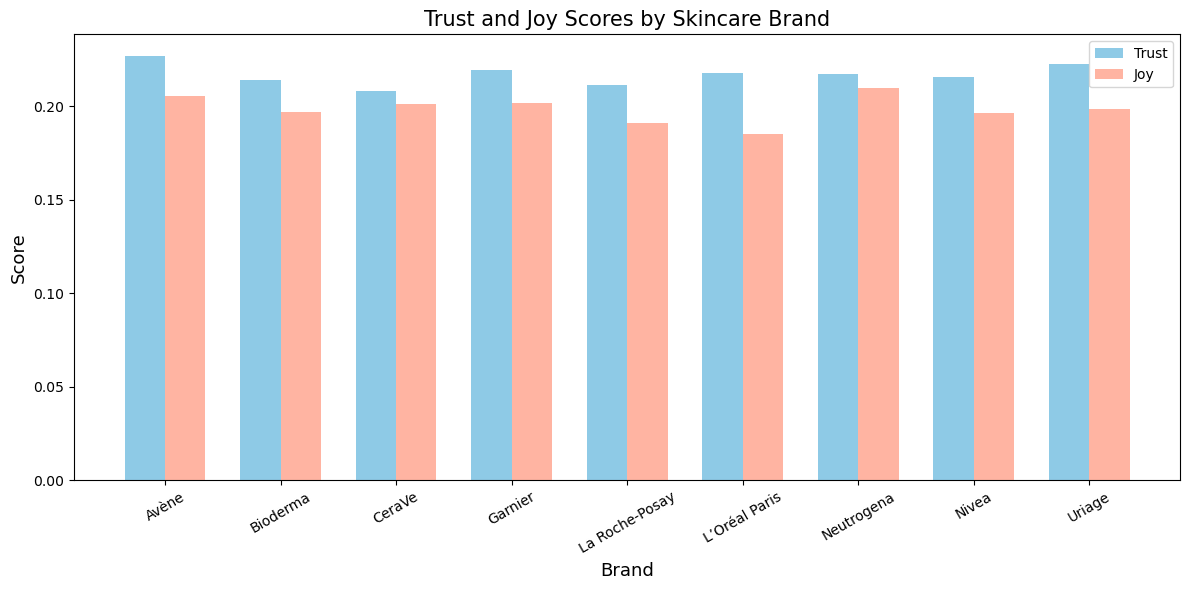

In [34]:
import pandas as pd
import numpy as np
# brand - trust, joy mean
brand_scores = combined_df.groupby("brand")[["trust", "joy"]].mean().reset_index()


x = np.arange(len(brand_scores["brand"]))
width = 0.35

# graph
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, brand_scores["trust"], width, label='Trust', color='#8ecae6')
rects2 = ax.bar(x + width/2, brand_scores["joy"], width, label='Joy', color='#ffb4a2')


ax.set_xlabel('Brand', fontsize=13)
ax.set_ylabel('Score', fontsize=13)
ax.set_title('Trust and Joy Scores by Skincare Brand', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(brand_scores["brand"], rotation=30)
ax.legend()

plt.tight_layout()
plt.show()